In [38]:
import yfinance as yf
import numpy as np
import json
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
prediction_length = 1
n = 200

In [40]:
plt.style.use('seaborn')

/tmp/ipykernel_2787324/240305066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [41]:
def plot_gbm(St, n, M, dt):
    time = np.linspace(0, n * dt, St.shape[0])
    tt = np.full(shape=(M, St.shape[0]), fill_value=time).T
    plt.plot(tt, St)
    plt.xlabel("Years $(t)$")
    plt.ylabel("Stock Price $(S_t)$")
    plt.show()

In [42]:
gbm_path = f'../results/cos_exp1/generation_log-2/'
data_path = gbm_path
real = np.load(data_path + 'real_samples.npy').T
synth = np.load(data_path + 'synth_samples.npy').T


In [43]:
synth.shape, real.shape

((198, 10000), (198, 10000))

In [44]:
# scale = np.mean(
#             np.abs(real[..., : -prediction_length]),
#             axis=-1,
#             keepdims=True,
#         )
# scaled_real = real/scale

In [45]:
synth.shape

(198, 10000)

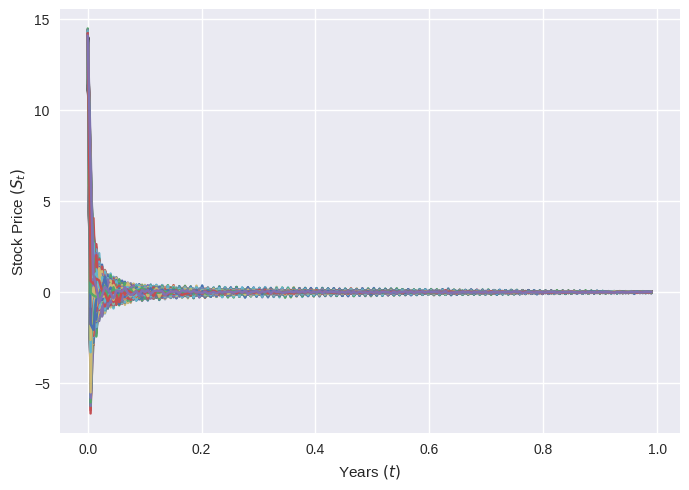

In [46]:
plot_gbm(synth, synth.shape[0], synth.shape[1], 1/n)

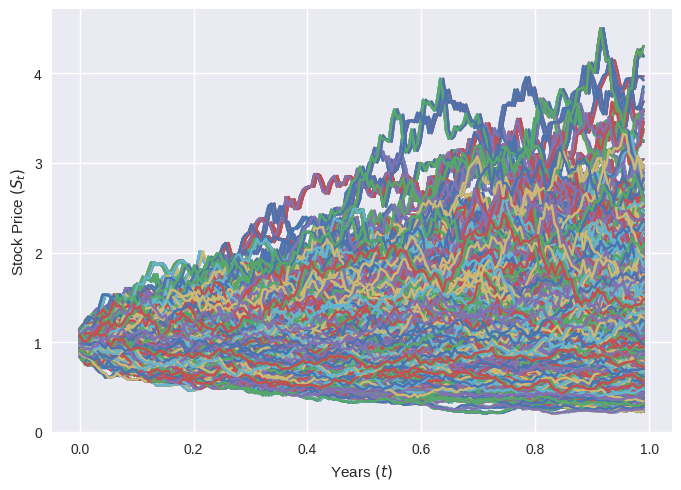

In [47]:
plot_gbm(real, real.shape[0], real.shape[1], 1/n)

In [48]:
from scipy.fftpack import idct, dct

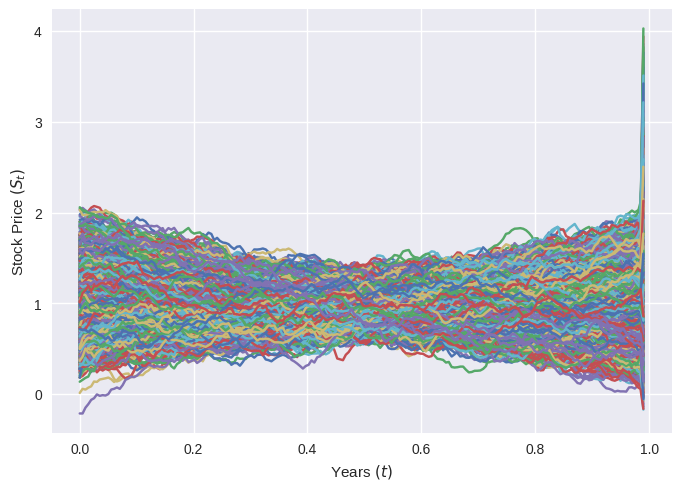

In [49]:
recovered_synth = idct(synth, axis=0, norm='ortho')
plot_gbm(recovered_synth, recovered_synth.shape[0], recovered_synth.shape[1], 1/n)

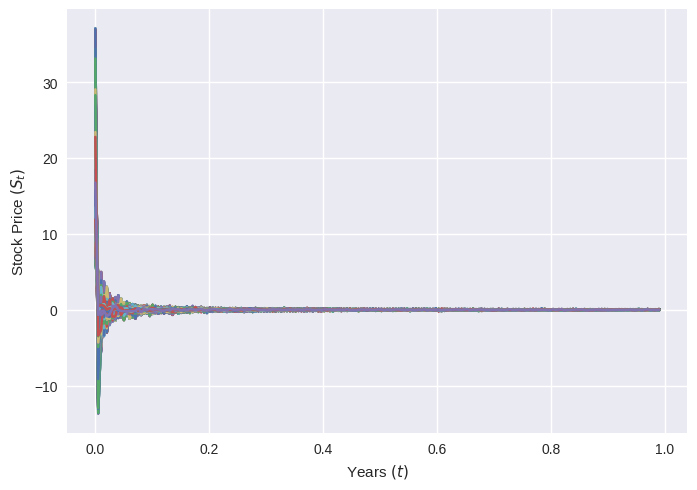

In [50]:
recovered_real = dct(real, axis=0, norm='ortho')
plot_gbm(recovered_real, recovered_real.shape[0], recovered_real.shape[1], 1/n)

In [51]:
# plt.plot(np.arange(scaled_real.shape[1]), scaled_real[:50].T)
# plt.title('Real GBM(50 paths)')
# plt.xlabel("Timesteps")
# plt.ylabel("Stock price")
# plt.legend()

ValueError: x and y must have same first dimension, but have shapes (10000,) and (50, 10000)

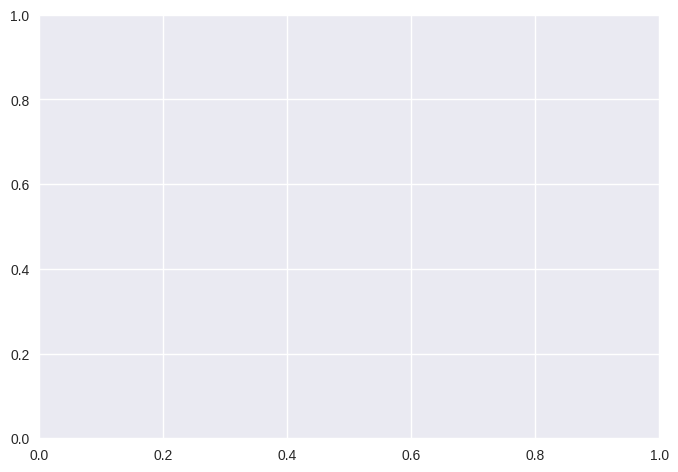

In [52]:
plt.plot(np.arange(synth.shape[1]), synth[0:50, :])
plt.title('Generated GBM(50 paths)')
plt.xlabel("Timesteps")
plt.ylabel("Stock price")
plt.legend()

In [ ]:
# from uncond_ts_diff.utils import descale
# synth_descaled = descale(synth, scale, 'mean')

In [ ]:
from gbm import estimate_parameters

ModuleNotFoundError: No module named 'gbm'

In [ ]:
synth.shape, real.shape

((10000, 200), (10000, 200))

In [ ]:
sigmas, mus = estimate_parameters(scaled_real.T, 1, 1000, ret_distribution=True)

n_bins = 30

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
fig.suptitle('TSDiff. Ground truth')

# Calculate the mean values
mean_sigma = np.mean(sigmas)
mean_mu = np.mean(mus)

# Real parameters
real_sigma = gbm_parameters[EXP_NUMBER-1]['sigma']
real_mu = gbm_parameters[EXP_NUMBER-1]['mu']

# Plot the histograms and add mean and real parameter lines
axs[0].hist(sigmas, bins=n_bins, alpha=0.7, color='blue', edgecolor='black')
axs[0].axvline(mean_sigma, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_sigma:.2f}')
axs[0].axvline(real_sigma, color='green', linestyle='solid', linewidth=2, label=f'Real: {real_sigma:.2f}')
axs[0].set_title('Sigmas')
# axs[0].set_xlim([-0.1, 0.6]) 
axs[0].legend()

axs[1].hist(mus, bins=n_bins, alpha=0.7, color='blue', edgecolor='black')
axs[1].axvline(mean_mu, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_mu:.2f}')
axs[1].axvline(real_mu, color='green', linestyle='solid', linewidth=2, label=f'Real: {real_mu:.2f}')
axs[1].set_title('Mus')
# axs[1].set_xlim([-2, 2]) 
axs[1].legend()

plt.show()

TypeError: estimate_parameters() got multiple values for argument 'ret_distribution'

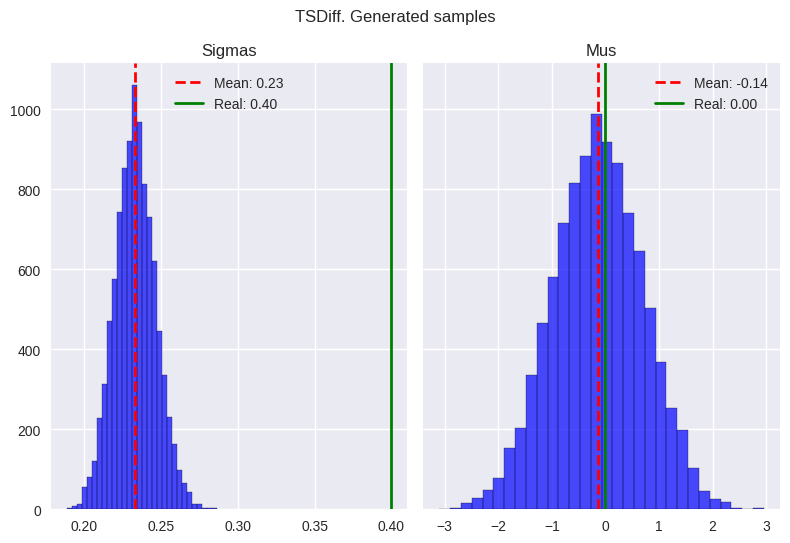

In [ ]:
sigmas, mus = estimate_parameters(synth.T, 1, 1000, ret_distribution=True)

n_bins = 30

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
fig.suptitle('TSDiff. Generated samples')

# Calculate the mean values
mean_sigma = np.mean(sigmas)
mean_mu = np.mean(mus)

# Real parameters
real_sigma = gbm_parameters[EXP_NUMBER-1]['sigma']
real_mu = gbm_parameters[EXP_NUMBER-1]['mu']

# Plot the histograms and add mean and real parameter lines
axs[0].hist(sigmas, bins=n_bins, alpha=0.7, color='blue', edgecolor='black')
axs[0].axvline(mean_sigma, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_sigma:.2f}')
axs[0].axvline(real_sigma, color='green', linestyle='solid', linewidth=2, label=f'Real: {real_sigma:.2f}')
axs[0].set_title('Sigmas')
axs[0].legend()

axs[1].hist(mus, bins=n_bins, alpha=0.7, color='blue', edgecolor='black')
axs[1].axvline(mean_mu, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_mu:.2f}')
axs[1].axvline(real_mu, color='green', linestyle='solid', linewidth=2, label=f'Real: {real_mu:.2f}')
axs[1].set_title('Mus')
axs[1].legend()

plt.show()

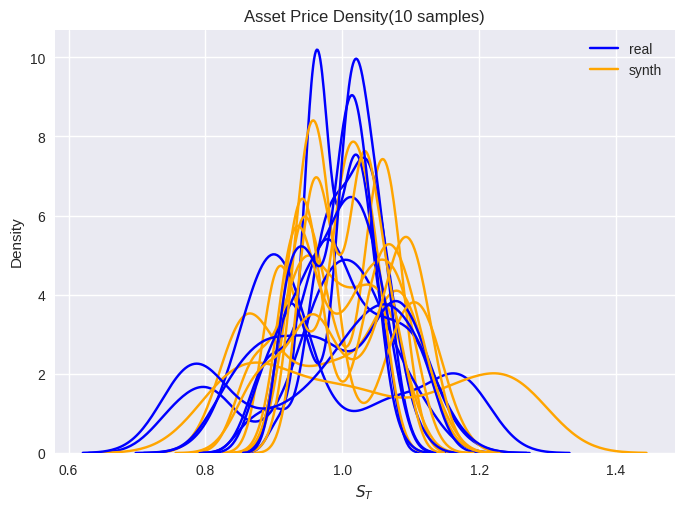

In [ ]:
num_samples = 10
indices = np.random.choice(len(scaled_real), num_samples, replace=False)

fig, ax = plt.subplots()

real_color = 'blue'
synth_color = 'orange'

for i, idx in enumerate(indices):
    sns.kdeplot(scaled_real[idx], color=real_color, label="real" if i == 0 else "", ax=ax)
    sns.kdeplot(synth[idx], color=synth_color, label="synth" if i == 0 else "", ax=ax)

plt.title(r'Asset Price Density(10 samples)')
plt.xlabel('$S_T$')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
sigmas.shape

(10000,)

In [ ]:
estimate_parameters(scaled_real.T, 1, 1000)

(0.3983150921692399, -0.010124565765610896)

In [ ]:
estimate_parameters(real.T, 1, 1000)

(0.39831510243992524, -0.010124553985428065)

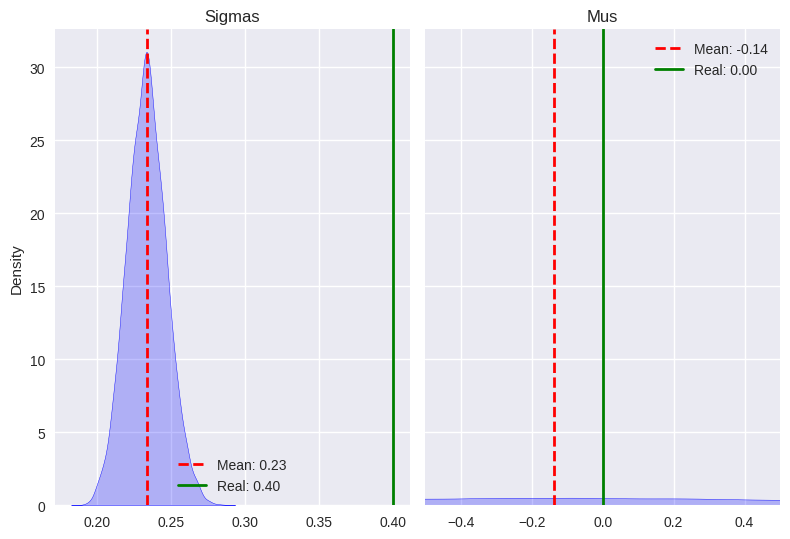

In [ ]:
# Create subplots
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# Plot the density function for sigmas
sns.kdeplot(sigmas, ax=axs[0], fill=True, color='blue')
axs[0].axvline(np.mean(sigmas), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {np.mean(sigmas):.2f}')
axs[0].axvline(gbm_parameters[EXP_NUMBER-1]['sigma'], color='green', linestyle='solid', linewidth=2, label=f'Real: {gbm_parameters[EXP_NUMBER-1]["sigma"]:.2f}')
axs[0].set_title('Sigmas')
axs[0].legend()

# Plot the density function for mus with adjusted bandwidth
sns.kdeplot(mus, ax=axs[1], fill=True, color='blue', bw_adjust=0.5)
axs[1].axvline(np.mean(mus), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {np.mean(mus):.2f}')
axs[1].axvline(gbm_parameters[EXP_NUMBER-1]['mu'], color='green', linestyle='solid', linewidth=2, label=f'Real: {gbm_parameters[EXP_NUMBER-1]["mu"]:.2f}')
axs[1].set_title('Mus')
axs[1].set_xlim([-0.5, 0.5])  # Adjust the x-axis limits
axs[1].legend()

plt.show()

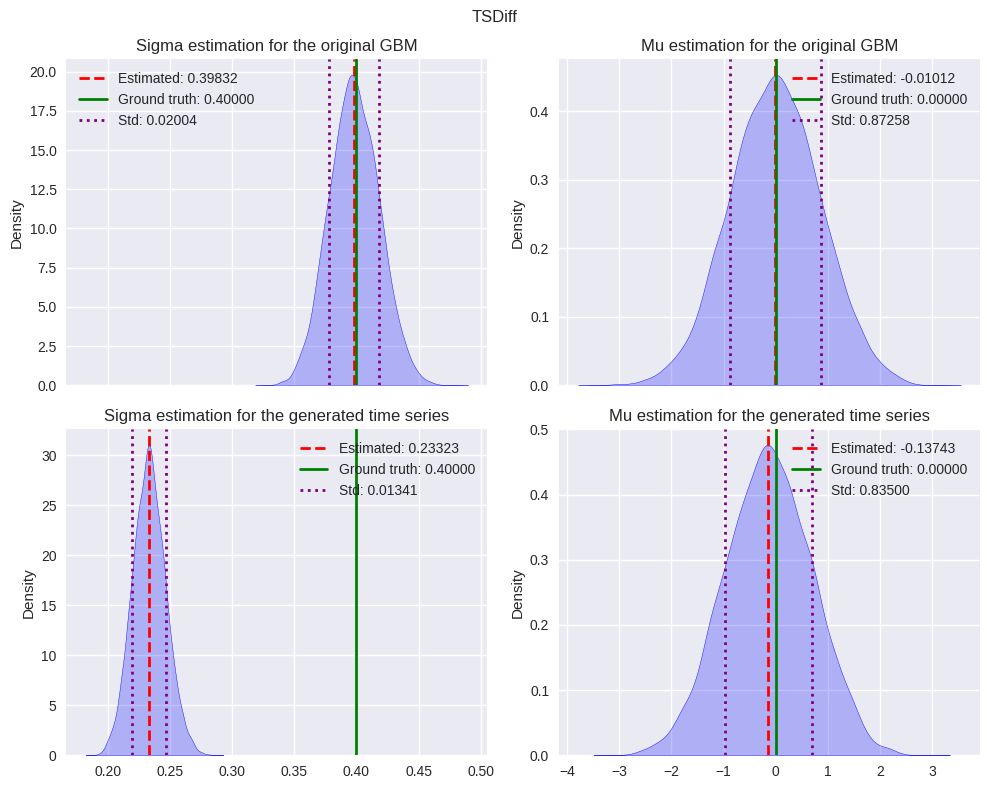

In [ ]:
n_bins = 30

fig, axs = plt.subplots(2, 2, tight_layout=True, sharex='col', figsize=(10, 8))
fig.suptitle('TSDiff')

# Ground truth
sigma_gt = gbm_parameters[EXP_NUMBER-1]['sigma']
mu_gt = gbm_parameters[EXP_NUMBER-1]['mu']

# Estimation for the original GBM
sigmas_real, mus_real = estimate_parameters(scaled_real.T, 1, 1000, ret_distribution=True)
estimated_sigma_real = np.mean(sigmas_real)
estimated_mu_real = np.mean(mus_real)
std_sigma_real = np.std(sigmas_real)
std_mu_real = np.std(mus_real)


sigmas_synth, mus_synth = estimate_parameters(synth.T, 1, 1000, ret_distribution=True)
estimated_sigma_synth = np.mean(sigmas_synth)
estimated_mu_synth = np.mean(mus_synth)
std_sigma_synth = np.std(sigmas_synth)
std_mu_synth = np.std(mus_synth)

sns.kdeplot(sigmas_real, ax=axs[0, 0], fill=True, color='blue')
# axs[0, 0].hist(sigmas_real, bins=n_bins, alpha=0.7, color='blue', edgecolor='black')
axs[0, 0].axvline(estimated_sigma_real, color='red', linestyle='dashed', linewidth=2, label=f'Estimated: {estimated_sigma_real:.5f}')
axs[0, 0].axvline(sigma_gt, color='green', linestyle='solid', linewidth=2, label=f'Ground truth: {sigma_gt:.5f}')
axs[0, 0].axvline(estimated_sigma_real + std_sigma_real, color='purple', linestyle='dotted', linewidth=2, label=f'Std: {std_sigma_real:.5f}')
axs[0, 0].axvline(estimated_sigma_real - std_sigma_real, color='purple', linestyle='dotted', linewidth=2)
axs[0, 0].set_title('Sigma estimation for the original GBM')
axs[0, 0].legend()

sns.kdeplot(mus_real, ax=axs[0, 1], fill=True, color='blue')
# axs[0, 1].hist(mus_real, bins=n_bins, alpha=0.7, color='blue', edgecolor='black')
axs[0, 1].axvline(estimated_mu_real, color='red', linestyle='dashed', linewidth=2, label=f'Estimated: {estimated_mu_real:.5f}')
axs[0, 1].axvline(mu_gt, color='green', linestyle='solid', linewidth=2, label=f'Ground truth: {mu_gt:.5f}')
axs[0, 1].axvline(estimated_mu_real + std_mu_real, color='purple', linestyle='dotted', linewidth=2, label=f'Std: {std_mu_real:.5f}')
axs[0, 1].axvline(estimated_mu_real - std_mu_real, color='purple', linestyle='dotted', linewidth=2)
axs[0, 1].set_title('Mu estimation for the original GBM')
axs[0, 1].legend()

sns.kdeplot(sigmas_synth, ax=axs[1, 0], fill=True, color='blue')
# axs[1, 0].hist(sigmas_synth, bins=n_bins, alpha=0.7, color='blue', edgecolor='black')
axs[1, 0].axvline(estimated_sigma_synth, color='red', linestyle='dashed', linewidth=2, label=f'Estimated: {estimated_sigma_synth:.5f}')
axs[1, 0].axvline(real_sigma, color='green', linestyle='solid', linewidth=2, label=f'Ground truth: {real_sigma:.5f}')
axs[1, 0].axvline(estimated_sigma_synth + std_sigma_synth, color='purple', linestyle='dotted', linewidth=2, label=f'Std: {std_sigma_synth:.5f}')
axs[1, 0].axvline(estimated_sigma_synth - std_sigma_synth, color='purple', linestyle='dotted', linewidth=2)
axs[1, 0].set_title('Sigma estimation for the generated time series')
axs[1, 0].legend()

sns.kdeplot(mus_synth, ax=axs[1, 1], fill=True, color='blue')
# axs[1, 1].hist(mus_synth, bins=n_bins, alpha=0.7, color='blue', edgecolor='black')
axs[1, 1].axvline(estimated_mu_synth, color='red', linestyle='dashed', linewidth=2, label=f'Estimated: {estimated_mu_synth:.5f}')
axs[1, 1].axvline(real_mu, color='green', linestyle='solid', linewidth=2, label=f'Ground truth: {real_mu:.5f}')
axs[1, 1].axvline(estimated_mu_synth + std_mu_synth, color='purple', linestyle='dotted', linewidth=2, label=f'Std: {std_mu_synth:.5f}')
axs[1, 1].axvline(estimated_mu_synth - std_mu_synth, color='purple', linestyle='dotted', linewidth=2)
axs[1, 1].set_title('Mu estimation for the generated time series')
axs[1, 1].legend()

plt.show()